<a href="https://colab.research.google.com/github/Abinash-bit/cancerprediction/blob/main/ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
df = pd.read_csv("/content/finallllll.csv")

In [20]:
df.shape


(159, 9)

In [21]:
df.head()

,Timesnaps,Number of People Entering,Number of People Exiting,Total People Entered,Total Estimated Person,Total food made for the persons,Amount of food consumed instantly,Total Food Available,Total Food that will be left
0,18.00,7,0,7,500,520,4.76,353.6,348.84
1,18.01,10,2,15,500,520,10.20,353.6,343.40
2,18.02,5,3,17,500,520,11.56,353.6,342.04
3,18.03,8,4,21,500,520,14.28,353.6,339.32
4,18.04,3,1,23,500,520,15.64,353.6,337.96


In [22]:
df.tail()

,Timesnaps,Number of People Entering,Number of People Exiting,Total People Entered,Total Estimated Person,Total food made for the persons,Amount of food consumed instantly,Total Food Available,Total Food that will be left
154,20.35,4,9,122,500,520,82.96,353.6,270.64
155,20.36,9,9,122,500,520,82.96,353.6,270.64
156,20.37,3,2,123,500,520,83.64,353.6,269.96
157,20.38,7,4,126,500,520,85.68,353.6,267.92
158,20.39,0,0,126,500,520,85.68,353.6,267.92


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Timesnaps                          159 non-null    float64
 1   Number of People Entering          159 non-null    int64  
 2   Number of People Exiting           159 non-null    int64  
 3   Total People Entered               159 non-null    int64  
 4   Total Estimated Person             159 non-null    int64  
 5   Total food made for the persons    159 non-null    int64  
 6   Amount of food consumed instantly  159 non-null    float64
 7   Total Food Available               159 non-null    float64
 8   Total Food that will be left       159 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 11.3 KB


In [24]:
df.describe()

,Timesnaps,Number of People Entering,Number of People Exiting,Total People Entered,Total Estimated Person,Total food made for the persons,Amount of food consumed instantly,Total Food Available,Total Food that will be left
count,159.000000,159.000000,159.000000,159.000000,159.0,159.0,159.000000,1.590000e+02,159.000000
mean,19.145912,9.106918,8.031447,196.918239,500.0,520.0,133.904403,3.536000e+02,219.695597
std,0.766840,6.154746,6.234268,102.353938,0.0,0.0,69.600678,1.710691e-13,69.600678
min,18.000000,0.000000,0.000000,7.000000,500.0,520.0,4.760000,3.536000e+02,105.400000
25%,18.395000,6.000000,3.000000,122.500000,500.0,520.0,83.300000,3.536000e+02,167.620000
50%,19.200000,8.000000,7.000000,212.000000,500.0,520.0,144.160000,3.536000e+02,209.440000
75%,19.795000,12.000000,12.000000,273.500000,500.0,520.0,185.980000,3.536000e+02,270.300000
max,20.390000,41.000000,25.000000,365.000000,500.0,520.0,248.200000,3.536000e+02,348.840000


In [25]:
df.isnull().sum()

Timesnaps                            0
Number of People Entering            0
Number of People Exiting             0
Total People Entered                 0
Total Estimated Person               0
Total food made for the persons      0
Amount of food consumed instantly    0
Total Food Available                 0
Total Food that will be left         0
dtype: int64

In [26]:
df["Total Food that will be left"]

0      348.84
1      343.40
2      342.04
3      339.32
4      337.96
        ...  
154    270.64
155    270.64
156    269.96
157    267.92
158    267.92
Name: Total Food that will be left, Length: 159, dtype: float64

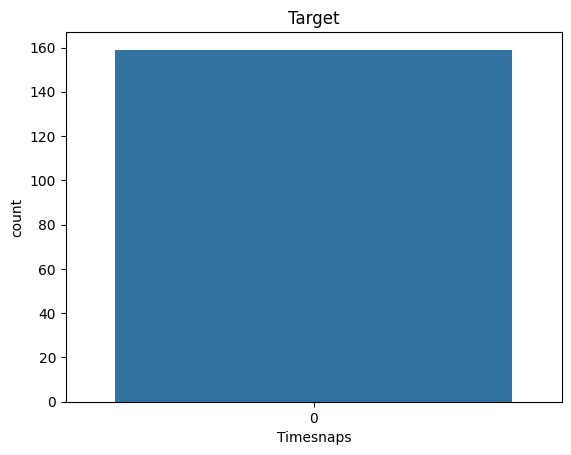

In [30]:
sns.countplot(df["Total Food that will be left"])
plt.xlabel("Timesnaps")
plt.title("Target")
plt.show()

In [31]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [32]:
X.shape

(159, 8)

In [33]:
y.shape

(159,)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99)

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [38]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
y_pred = rf.predict(X_test)

In [40]:
y_pred

array([209.3584, 153.1836, 264.7444, 192.746 , 189.686 , 338.4768,
       252.9736, 248.0436, 333.7712, 144.976 , 326.8964, 121.5432,
       167.5316, 195.4252, 200.4708, 124.4196, 326.7468, 270.2456,
       194.65  , 306.2176, 132.43  , 333.8324, 127.3912, 256.5776,
       248.5604, 148.7908, 132.5592, 124.5964, 247.8872, 118.8164,
       179.5948, 186.1296, 337.1848, 234.0016, 262.6024, 239.258 ,
       111.1188, 289.1836, 328.2972, 135.6872])